# Import Packages

In [1]:
#!pip install seaborn livelossplot

import os
from os.path import join

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses, metrics, callbacks
from livelossplot import PlotLossesKeras

2022-12-16 13:17:39.877074: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


# Set Random Seed

In [2]:
def set_random_seed_tf(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    tf.keras.utils.set_random_seed(seed)
    tf.config.experimental.enable_op_determinism()

SEED = 42    
set_random_seed_tf(SEED)

# 1. Load dataset

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# 2. Preprocessing

In [4]:
x_train, x_test = x_train / 255, x_test / 255

INPUT_SHAPE  = (x_train.shape[1], x_train.shape[2])
OUTPUT_SHAPE = 1
N_CLASSES    = len(np.unique(y_train))

print("Training(X, y):", x_train.shape, y_train.shape)
print("Test(X, y):", x_test.shape, y_test.shape)
print("Number of classes:", N_CLASSES)

Training(X, y): (60000, 28, 28) (60000,)
Test(X, y): (10000, 28, 28) (10000,)
Number of classes: 10


# 3. Modeling

In [5]:
UNITS   = 128
DROPOUT = 0.2

model = keras.Sequential([
    layers.Flatten(input_shape=INPUT_SHAPE),
    layers.Dense(UNITS, activation='relu'),
    layers.Dropout(DROPOUT),
    layers.Dense(N_CLASSES, activation='softmax')
])

model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

2022-12-16 13:17:42.362403: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-16 13:17:42.378244: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-16 13:17:42.378436: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-16 13:17:42.379395: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the ap

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# 4. Training

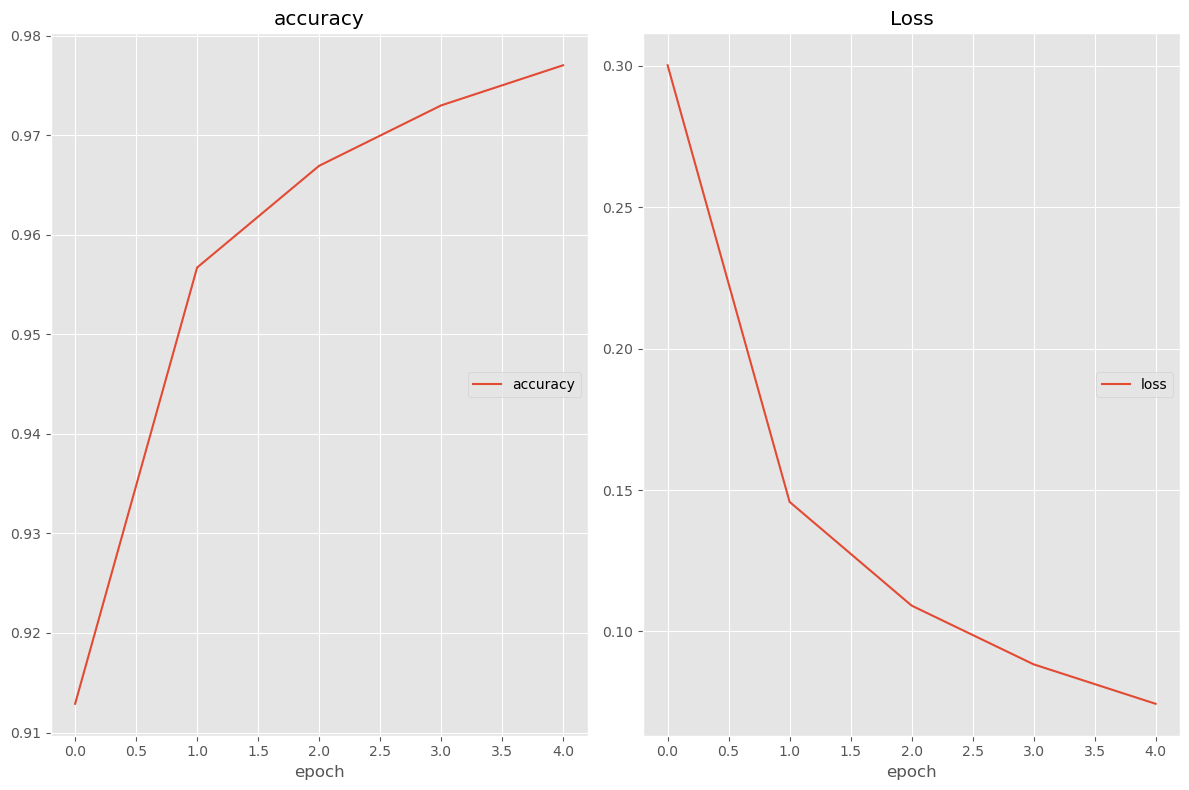

accuracy
	accuracy         	 (min:    0.913, max:    0.977, cur:    0.977)
Loss
	loss             	 (min:    0.074, max:    0.300, cur:    0.074)
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0744 - accuracy: 0.9770


In [6]:
EPOCHS = 5

model.fit(x_train, y_train, epochs=EPOCHS, callbacks=[PlotLossesKeras()])

# 5. Evaluation

In [7]:
model.evaluate(x_test, y_test, verbose=0)

[0.07708548754453659, 0.9767000079154968]